<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/10_15_3_Remocon_Image_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train a Custom Resnet34 for Image Classification in fastai and PyTorch
Can I computer tell the diffence between a daisy and a dandelion? The answer is yes


This tutorial shows you how to train a state of the art image classification model with Resnet, in PyTorch, using the fastai library.

### Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [how to train Resnet34 image classification model](https://blog.roboflow.ai/how-to-train-yolov5-on-a-custom-dataset/), concurrently.

### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train Resnet to recognize your custom classes. We use a [public flowers classification dataset](
https://public.roboflow.com/classification/flowers_classification), which is open source and free to use. You can also use this notebook on your own data.

To train our custom classifier we take the following steps:

* Install fastai dependencies
* Expand our training set via augmentations in Roboflow
* Download custom classificatio data from Roboflow
* Download pretrained Resnet Models
* Run frozen Resent training in fastai
* Find a favorable learning rate
* Run unfrozen training
* Inspect our model's evaluation metrics 
* Run Resnet inference on test images
* Export saved Resnet weights for future inference



# Install fastai dependencies

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision import * #임포트

In [ ]:
!pwd

/content


In [ ]:
!ls -l

total 4320
drwxr-xr-x 2 root root    4096 Oct 15 01:40 models
-rw-r--r-- 1 root root     489 Oct 14 13:30 README.roboflow.txt
-rw-r--r-- 1 root root 4395347 Oct 15 01:31 remocon.v1i.folder.zip
drwxr-xr-x 1 root root    4096 Oct  8 13:45 sample_data
drwxr-xr-x 5 root root    4096 Oct 14 13:30 test
drwxr-xr-x 5 root root    4096 Oct 14 13:30 train
drwxr-xr-x 5 root root    4096 Oct 14 13:30 valid


In [ ]:
!unzip ./rock-paper-scissors.zip

# Download Custom Classification Data From Roboflow

In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="folder", notebook="roboflow-resnet")

     |████████████████████████████████| 178 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 31.8 MB/s 
     |████████████████████████████████| 138 kB 48.6 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 62 kB 779 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=folder&ref=roboflow-resnet


In [ ]:
#dataset imported from Roboflow. You can sign up at roboflow.com and upload your image classification dataset
# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace().project("YOUR_PROJECT")
# dataset = project.version("YOUR VERSION").download("folder")


In [ ]:
#!unzip ./remocon.v1i.folder.zip

In [ ]:
#dataset.location

In [ ]:
!pwd

/content


In [ ]:
!ls -l

total 4320
drwxr-xr-x 2 root root    4096 Oct 15 01:40 models
-rw-r--r-- 1 root root     489 Oct 14 13:30 README.roboflow.txt
-rw-r--r-- 1 root root 4395347 Oct 15 01:31 remocon.v1i.folder.zip
drwxr-xr-x 1 root root    4096 Oct  8 13:45 sample_data
drwxr-xr-x 5 root root    4096 Oct 14 13:30 test
drwxr-xr-x 5 root root    4096 Oct 14 13:30 train
drwxr-xr-x 5 root root    4096 Oct 14 13:30 valid


In [ ]:
#build fastai dataset loader
np.random.seed(42)
#fastai automatically factors the ./train and ./valid folders into seperate datasets
#more details https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_folder
path = Path('/content/3class-2021-01-27')
#인풋 사이즈 224 224 #임포트
#content가 1000개가 나감, 언프리즈
data = ImageDataBunch.from_folder(path, size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#double check the data classes
data.classes

['paper', 'rock', 'scissors']

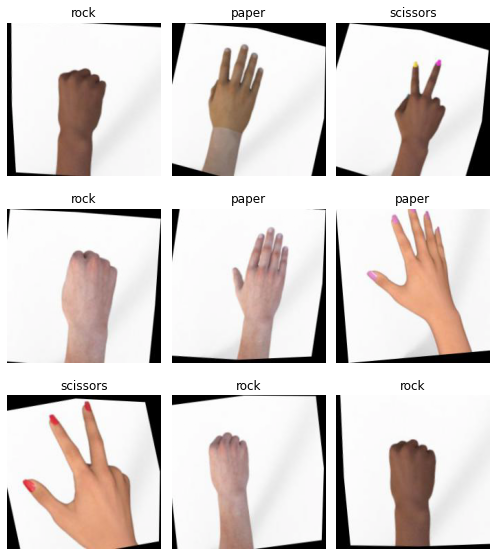

In [ ]:
#take a peak at the batch to make sure things were loaded correctly
data.show_batch(rows=3, figsize=(7, 8))


# Set up fastai Resnet model

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)
#패스트 ai는 
#error rate는 1-accuracy #임포트

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#print network layers 
learn#모델 점 서머리

# Train Custom Resnet Image Classifier

In [ ]:
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=20)
save_best_model = SaveModelCallback(learn, name='kosa_resnet34')

In [ ]:
#frozen training step #프리즈 하기 전의 cuda, gpu가 있나? 최저점을 확인하기 위해
#페이션시가 20번을 더 감
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1, callbacks=[early_stop, save_best_model])

epoch,train_loss,valid_loss,error_rate,time
0,0.583470,0.264543,0.069444,00:09


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 0.26454269886016846.


In [ ]:
#load best model from frozen training
learn.load('kosa_resnet34')
#왜 로드를 할려 할까?
#아웃풋 클래스가 1000개 짜리를 3개로 바꾸려면 로드를 해서 락을 풀어야

In [ ]:
learn.unfreeze()#딱 한 에포크를 돌림, 그럼 클래스가 1000개가 3개로 바뀜?

In [ ]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)
    
    
    #loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #return the learning rate that produces the minimum loss divide by 10   
    return lrs[min_loss_index] / 10

In [ ]:
optimal_lr = find_appropriate_lr(learn)#러닝레이트를 자동으로 찾음
#데이터 셋에 따라 다르게 나온다? gpu가 달라서?

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
#optimal_lr #로스값이 편차가 크면 러닝레이트를 크게 가져감

0.00020892961308540406

In [ ]:
learn.fit_one_cycle(100, max_lr=slice(optimal_lr/10, optimal_lr), callbacks=[early_stop, save_best_model])
#0.000 오버피팅 들어감 #100으로 바꾸기
#최저값이 있으면 그걸로 바꾸게 될 것
#왜 44에 서는가? 최저로스라고 판단하게 되어

epoch,train_loss,valid_loss,error_rate,time
0,0.032051,0.014017,0.000000,00:09
1,0.016164,0.012694,0.013889,00:08
2,0.010075,0.008334,0.000000,00:08
3,0.006813,0.003157,0.000000,00:08
4,0.005080,0.001018,0.000000,00:08
5,0.003675,0.000810,0.000000,00:09
6,0.004110,0.000473,0.000000,00:08
7,0.004062,0.000335,0.000000,00:09
8,0.003130,0.000431,0.000000,00:08
9,0.002481,0.000578,0.000000,00:09


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 0.014016802422702312.
Better model found at epoch 1 with valid_loss value: 0.012694108299911022.
Better model found at epoch 2 with valid_loss value: 0.008334497921168804.
Better model found at epoch 3 with valid_loss value: 0.003157128347083926.
Better model found at epoch 4 with valid_loss value: 0.0010183504782617092.
Better model found at epoch 5 with valid_loss value: 0.0008097126265056431.
Better model found at epoch 6 with valid_loss value: 0.00047285310574807227.
Better model found at epoch 7 with valid_loss value: 0.0003352492640260607.
Better model found at epoch 10 with valid_loss value: 0.00023589743068441749.
Better model found at epoch 11 with valid_loss value: 0.00018083279428537935.
Better model found at epoch 12 with valid_loss value: 0.00017334084259346128.
Better model found at epoch 13 with valid_loss value: 5.851045443705516e-06.
Better model found at epoch 15 with valid_loss value: 2.1358280832828314e-07.
Better

In [ ]:
learn.load('kosa_resnet34')#임포트


Learner(data=ImageDataBunch;

Train: LabelList (768 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scissors,scissors,scissors,scissors,scissors
Path: /content/3class-2021-01-27;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scissors,scissors,scissors,scissors,scissors
Path: /content/3class-2021-01-27;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

# Evaluate Classifier Performance

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


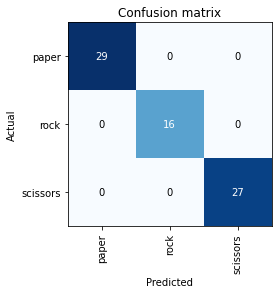

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


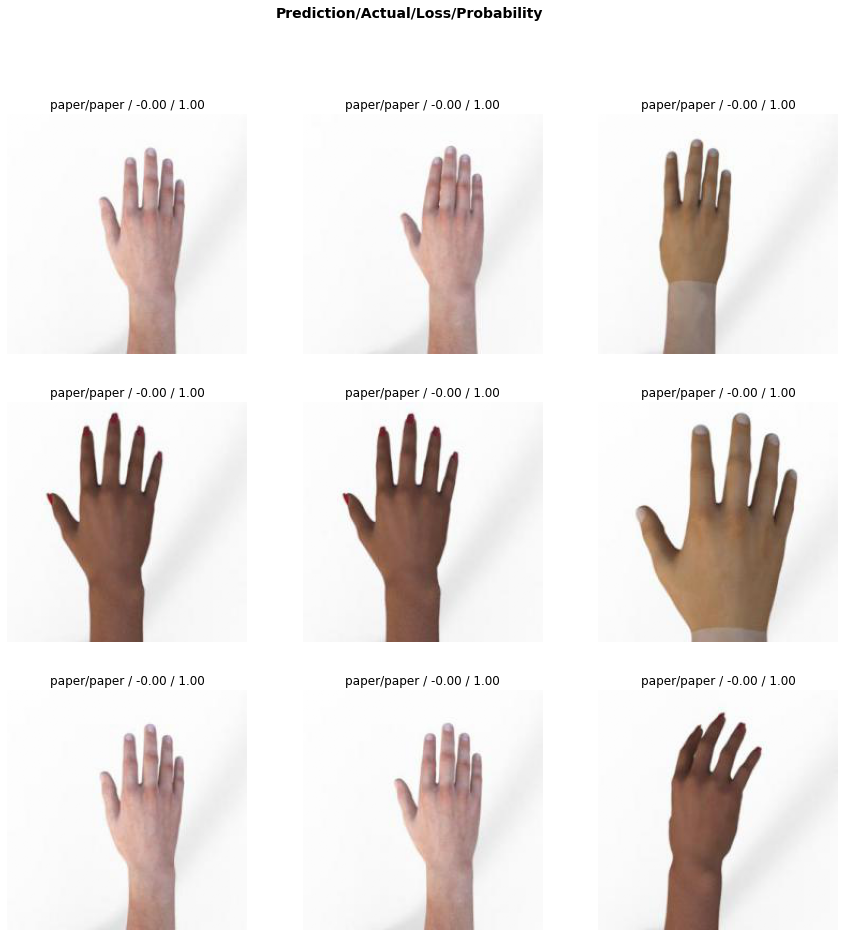

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))
# 컵을 컵으로 리모컨을 리모컨으로...

/content/testrock04-07_png_jpg.rf.eb515a729ac9ed6ef645daeef54cd5f7.jpg
rock


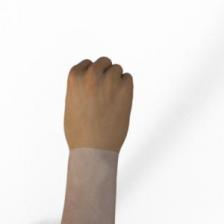



/content/testrock04-11_png_jpg.rf.d175edf0c31e9ce96f6a6fda29c15e04.jpg
rock


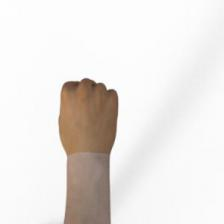

In [ ]:
#run inference on test images #임포트
import glob
from IPython.display import Image, display

model = learn.model
#model = model.cuda()
for imageName in glob.glob('/content/3class-2021-01-27/test/*/*.jpg'):
  #('/contnet/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    #print(prediction)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

# Save custom classification model for future use

In [ ]:
#model is automatically saved with the "save_best_model" callback
%ls models/

In [ ]:
from google.colab import files
files.download('./models/best_resnet34.pth')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!cp /content/drive/MyDrive/r1.jpg

In [ ]:
#!ls -l p1.jpg